In [1]:
%%capture
%run shared.ipynb

import matplotlib
from matplotlib import figure
from IPython.display import Markdown
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=15) 
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('axes', grid=False)
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=18)
plt.rc('figure', figsize=(12,12))
matplotlib.rcParams['figure.dpi'] = 100

## Visualizing queer identities

Kira M. Del Mar (2021)

This is an interactive [Voilà](https://github.com/voila-dashboards/voila/blob/master/README.md) dashboard view of a [Jupyter Notebook](https://jupyter.org), with data from the national survey "Is the library for everyone? LGBTQIA+ people's attitudes toward and experiences with public libraries in Norway." 
You probably found your way here via <a href="http://BibliotekForAlle.carrd.co" target="_blank">BibliotekForAlle.carrd.co</a>, but if not, you can visit the carrd for supplementary material.

### Allowing for complexity
Statistical analysis generally requires neat categories, but queer identities are seldom neat and tidy. Rather than force respondents to choose only one orientation, I allowed for for multiple choices, and in this notebook-in-progress, I have been working on different ways to explore and visualize the complexity of queer identities. 

<img src="figs/engelsk.png" alt="Screenshot from the survey showing choices of eight different orientations" width="750"/>


### Total respondents vs total responses

When grouping survey respondents by orientation, I faced a choice between creating mutually exclusive groups that included fewer than half of the respondents (about 40% chose only one label for their orientation), or creating overlapping groups that included about twice as many data points as there were respondents.

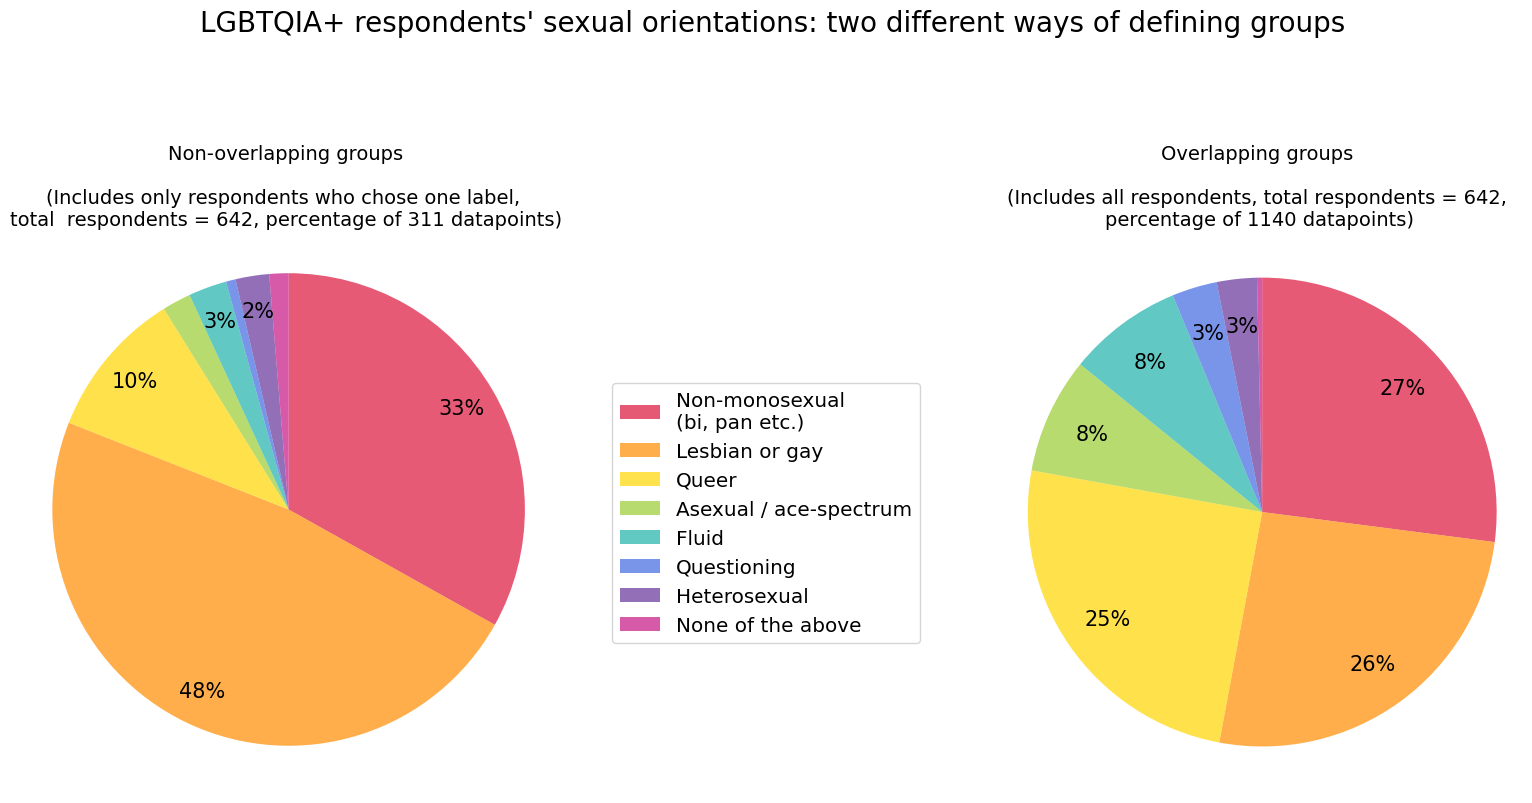

In [2]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def my_autopct(pct):
    if pct >= 2:
        return f'{pct:.0f}%'
    else:
        return None


labels = 'Non-monosexual \n(bi, pan etc.)', 'Lesbian or gay', 'Queer', 'Asexual / ace-spectrum', 'Fluid', 'Questioning', 'Heterosexual', 'None of the above'
sizes1 = [len(bi_only), len(LG_only), len(q_only), len(ace_only), len(fluid_only), len(questioning_only), len(het_only), len(none_only)]
sizes2 = [len(bi_plus), len(LG_plus), len(q_plus), len(ace_plus), len(fluid_plus), len(questioning_plus), len(het_plus), len(none_only)]
colors = ['crimson', 'darkorange', 'gold', 'yellowgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', "MediumVioletRed"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].pie(sizes1, explode=None, labels=labels, counterclock=False, colors = colors, wedgeprops={'alpha':0.7}, textprops={'fontsize': '15'}, labeldistance=None, pctdistance=.85, autopct=my_autopct,
        shadow=False, startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].pie(sizes2, explode=None, labels=labels, counterclock=False, colors = colors, wedgeprops={'alpha':0.7}, textprops={'fontsize': '15'}, labeldistance=None, pctdistance=.8, 
        autopct=my_autopct,
        shadow=False, startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Non-overlapping groups\n\n(Includes only respondents who chose one label, \ntotal  respondents = 642, percentage of 311 datapoints)', fontsize=14)
axs[1].set_title('Overlapping groups \n\n(Includes all respondents, total respondents = 642, \npercentage of 1140 datapoints)', fontsize=14)
axs[1].title.set_position([.5, 0])
plt.legend(fontsize="x-large", loc="center left", bbox_to_anchor=(-.75, 0, 0, 1))
plt.suptitle("LGBTQIA+ respondents' sexual orientations: two different ways of defining groups", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=.7, wspace=.85, hspace=0)
plt.show()

## Interactive:

Most LGBTQIA+ respondents (about 57%) chose more than one label to describe their orientation. This means that static figures like the pie charts above give a false picture that does not reflect the data's complexity.

Choose two or more orientations from the drop-down menus to see examples of how much overlap there is between different orientations. 
(Overlap is not to scale)

In [3]:
reversed_orientations={}
reversed_orientations["Choose an orientation"]=""
for k,v in orientation_names.items():
    reversed_orientations[v]=k

dropdown1=widgets.Dropdown(options=reversed_orientations, value='')
dropdown2=widgets.Dropdown(options=reversed_orientations, value='')
dropdown3=widgets.Dropdown(options=reversed_orientations, value='')
gui_in_visual_basic=widgets.VBox([dropdown1, dropdown2, dropdown3])

def interactive_venn(O1, O2, O3):
    if not O1:
        O1 = O2
        O2 = None
    if not O2:
        O2 = O3
        O3 = None
    if not O1 or not O2:
        print("Pick at least two to generate a Venn diagram")
        return
    orientation_venn(O1, O2, O3)

out = widgets.interactive_output(interactive_venn, {"O1":dropdown1, "O2":dropdown2, "O3":dropdown3})
out.layout.height = '650px'
display(gui_in_visual_basic, out)



Output(layout=Layout(height='650px'))

### Total share of each group who chose *only* that orientation

A majority of all respondents selected multiple terms to describe their sexual orientation. Gay & lesbian respondents were the most likely to select only one response, followed by heterosexual respondents, then non-monosexual respondents. More than 60% of non-monosexual respondents also use other terms to describe their sexual orientation. 

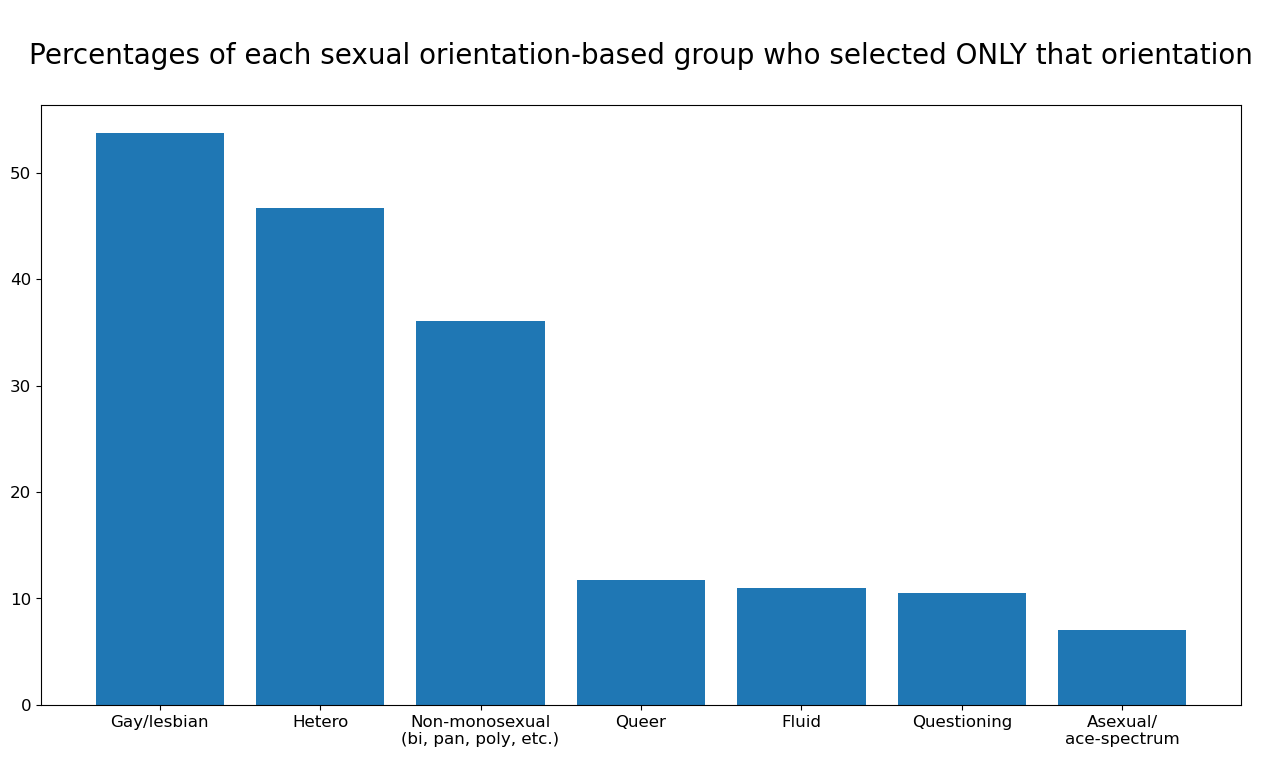

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
groups = ['Gay/lesbian', 'Hetero', 'Non-monosexual\n(bi, pan, poly, etc.)', 'Queer', 'Fluid', 'Questioning', 'Asexual/\nace-spectrum']
percentages = [53.7,46.7,36.1,11.7,11.0,10.5,7.0]
ax.bar(groups,percentages)

plt.tick_params(labelsize=12)
plt.title(label='\nPercentages of each sexual orientation-based group who selected ONLY that orientation\n', size=20)
plt.show()

In [5]:
from IPython.display import display, Markdown

bi_plus_S = df[
    df.Seksuell_orientering.str.contains("Bi")
]

LG_plus_S = df[
    df.Seksuell_orientering.str.contains("LG")
]

het_plus_S = df[
    df.Seksuell_orientering.str.contains("Het")
]

none_plus_S = df[
    df.Seksuell_orientering.str.contains("NONE")
]

q_plus_S = df[
    df.Seksuell_orientering.str.contains("Q")
]

fluid_plus_S = df[
    df.Seksuell_orientering.str.contains("Fluid")
]

ace_plus_S = df[
    df.Seksuell_orientering.str.contains("Ace")
]

questioning_plus_S = df[
    df.Seksuell_orientering.str.contains("SU")
]

orientation_keys = {
    "LG" : (LG_plus_S, LG_only, "Gay or Lesbian"),
    "Bi" : (bi_plus_S, bi_only, "Non-monosexual (bi, pan, etc.)"),
    "Het" : (het_plus_S, het_only, "Heterosexual"),
    "None" : (none_plus_S, none_only, "'None of the above'"),
    "Q" : (q_plus_S, q_only, "Queer"),
    "Fluid" : (fluid_plus_S, fluid_only, "Fluid"),
    "Ace" : (ace_plus_S, ace_only, "Asexual / ace-spectrum"),
    "Questioning" : (questioning_plus_S, questioning_only, "Questioning"),
}



def print_group_info(key):
    x_plus, x_only, x_label = orientation_keys[key]
    
    x_only_count = len(x_only)
    x_plus_count = len(x_plus)
        
    x_only_frac = x_only_count/x_plus_count
    lines = []
    lines.append(f"{x_label} respondents (overlapping): {len(x_plus)}")
    lines.append(f"{x_label} respondents (non-overlapping): {len(x_only)}")
    lines.append(f"{x_only_frac:.1%} of those who selected {x_label} selected *only* this label")
    lines.append("")
    lines.append("")
    display(Markdown("<br>".join(lines)))
    

#for key in orientation_keys.keys():
 #   print_group_info(key)
    
   

### Differing sexual & romantic orientations

Approximately 17% of all respondents have differing romantic & sexual orientations, with an additional 10% questioning whether their orientations differ. There is comparatively little previous research on romantic orientation, which makes this an interesting finding. I am still working on how to visualize this additional dimension of respondents' identities. 

In [6]:
 def print_RO_info(key):
    x_plus, x_only, x_label = orientation_keys[key]
    
    annen_RO_count = len(x_plus[x_plus.Annen_RO=="Y"])
    total_count = len(x_plus)
        
    RO_frac = annen_RO_count/total_count
    lines = []
    lines.append(f"{RO_frac:.1%} of {x_label} respondents (N = {total_count}) have a romantic orientation that differs from their sexual orientation")
    lines.append("")
    lines.append("")
    display(Markdown("<br>".join(lines)))

#for key in orientation_keys.keys():
 #   print_RO_info(key)


dropdown=widgets.Dropdown(options={value[2]:key for key, value in orientation_keys.items()})
dropdown.layout.width='250px'

def function(pickone):
    sexor=orientation_keys[pickone]
    print_RO_info(pickone)

out = widgets.interactive_output(function, {"pickone":dropdown})
display(dropdown, out)

Dropdown(layout=Layout(width='250px'), options={'Gay or Lesbian': 'LG', 'Non-monosexual (bi, pan, etc.)': 'Bi'…

Output()

In [20]:
english_groups_dict = {
         "Compare cis-hetero, cis-queer & trans (incl. non-binary) respondents" : chcsts,
         "Compare cis-hetero and all LGBTQIA+ respondents" : overall_groups,
         "Compare queer respondents grouped by sexual orientation" : LGBQAplus_groups,
         "Compare queer respondents grouped by sexual orientation (cis respondents only)" : cis_LGBQA_groups,
         "Compare queer respondents grouped by sexual orientation (trans respondents only)" : tnb_LGBQA_groups,
     }   

questions_dict = {
        "In general, it is important for me to see my own [queer/LGBTQIA+] identity reflected in books and other media" : "Rep_matters_all",
        "The library usually has what I am looking for, when I am looking for specific [queer] materials" : 'Bib_pleier_ha',
        "It is easy for me to find a good selection of books and other media at the library \nwhere the main character(s) have the same gender identity as me" : 'Utvalg_KID',
        "It is easy for me to find a good selection of books and other media at the library \nwhere the main character(s) have the same sexual and/or romantic orientation as me" : 'Utvalg_Orientering',
        "It is easy for me to find queer materials at the library where [queer] characters \nlike me get a happy ending and do not necessarily end in tragedy" : 'Utvalg_lykkelig',
        " " : " ",
        "In general, I see public libraries in Norway as safe spaces for queer/LGBTQIA+ people" : 'Trygge_rom_gen_all',
        "I always feel safe and welcome at the library" : "Alltid_velkommen",    
        "I feel that I can always be completely myself at the library" : "Helt_meg_selv",
        "Sometimes I wonder or worry about [how my queer/LGBTQIA+ identity will impact] \nhow I will be treated by library employees" : 'Minoritetsstress_ansatte',
        "Sometimes I wonder whether or worry that others are judging me \nwhen I look at [queer] media at the library " : 'Minoritetsstress_brukere',
        "It is mainly other library users (rather than the employees or the physical space) \nthat impact how safe or unsafe I feel at the library as a queer/LGBTQIA+ person" : 'Andre_brukere',
        "My queer/LGBTQIA+ identity has nothing to do with how safe or unsafe I feel at the library" : 'Ingen_rolle',
    }

sorting_dict = {
        'Sort by strong agreement (descending order)' : 'se_descending',
        'Sort by overall agreement (somewhat or strongly agree, descending order)' : 'ce_descending',
        'Sort by strong disagreement (descending order)' : 'su_descending',
        'Sort by overall disagreement (somewhat or strongly disagree, descending order)' : 'cu_descending',
    }

from IPython.display import Markdown
import string

safe_chars = string.ascii_letters + ".- åæø"

import os

os.makedirs("figs", exist_ok=True)


def strip_safe(s):
    return "".join(c for c in s if c in safe_chars)



def new_interactive(enighet_columns_dict, comparison_groups_dict):

    question_dropdown = widgets.Dropdown(options=enighet_columns_dict)
    group_dropdown = widgets.Dropdown(options=comparison_groups_dict.keys())
    group_dropdown.layout.width = "100%"
    question_dropdown.layout.width = "100%"

    select_sorting = widgets.Dropdown(options=sorting_dict.keys())
    select_sorting.layout.width = "100%"

    save_button = widgets.Button(description="save")
    fig = None

    def save(_):
        with out:
            column = question_dropdown.value
            group_name = group_dropdown.value
            sorting = sorting_dict[select_sorting.value]
            n = len(os.listdir('figs'))
            fname = f"figs/{n:03}.{column}.{strip_safe(group_name)}.{sorting}.png"

            print("saving", fname)
            fig.set_facecolor("white")
            #             fig.get_axes()[0].set_facecolor("white")
            fig.savefig(fname, bbox_inches="tight", transparent=False)

    save_button.on_click(save)

    def select_groups(change=None):
        column = question_dropdown.value
        matching_groups = []
        for group_name, group_dict in comparison_groups_dict.items():
            if not any(
                len(sub_group[column].dropna()) == 0
                for sub_group in group_dict.values()
            ):
                matching_groups.append(group_name)
        group_dropdown.options = matching_groups

    select_groups()
    question_dropdown.observe(select_groups, "value")

    gui_in_visual_basic = widgets.VBox(
        [question_dropdown, group_dropdown, select_sorting, save_button]
    )

    def function(pickone, column, sort):
        groups = comparison_groups_dict[pickone]
        sort = sorting_dict[sort]
        for group_name, group_df in groups.items():
            if len(group_df.dropna(subset=[column], axis=0)) == 0:
                display(
                    Markdown(
                        f"## Ingen data tilgjengelig (noen spørsmål ble ikke besvart av alle grupper)"
                    )
                )
                return
        enighet(
            groups, column, title=f"\n{question_dropdown.label} \n", group_order=sort
        )
        nonlocal fig
        fig = plt.gcf()
        plt.show()

    out = widgets.interactive_output(
        function,
        {
            "column": question_dropdown,
            "pickone": group_dropdown,
            "sort": select_sorting,
        },
    )
    out.layout.height = "800px"
    display(gui_in_visual_basic, out)

#For different options of questions & groups, replace function arguments with:
# oppgave_dict or rep_access_dict, 
# gen_comparison_groups or s_internal_comparison_groups or ch_internal_comparison_groups

new_interactive(questions_dict, english_groups_dict)

Output(layout=Layout(height='800px'))

### Follow my work

Follow along on [Twitter](http://twitter.com/kiradelmar) if you'd like to stay up to date! If you read Norwegian, you can also read more about my methodology in this study on the blog [Bibliotek for alle](https://medium.com/bibliotek-for-alle/vi-trenger-mer-forskning-som-rommer-kj%C3%B8nns-og-seksualitetsmangfold-fe7ef2c57e8c?source=friends_link&sk=ebb1acb74a6cdf5fa4cd253a061c2f81) (Libraries for everyone). 